In [89]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import house_sales_data as hsd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
## Sacramento house price data; load
data = hsd.house_sales_data() 
print(data.keys())

## Get the target (i.e., price) and two features
price = data['price']
area = data['area']
beds = data['beds']

dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [52]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    costs = np.zeros(max_iteration)
    # now complete ...
    alpha = learning_rate         
    for t in range(max_iteration):
        grad = np.zeros(n)
        for i in range(m):
            y_pred = X[i] @ theta
            costs[t] += 1/m * (y_pred - y[i])**2
            for j in range(n):
                grad[j] += 1/m * 2 * (y_pred - y[i])*X[i,j]
        theta -= alpha * grad
    return theta, costs 

In [53]:
# Normalize data 
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    
    return X,y,min_X, max_X, min_y, max_y

In [54]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    mse = sum((y-y_hat)**2)
    return mse

In [55]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
X, y, min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# call gradient descent and fine-tune your learning rate
iters = 1001
alpha = 0.1
theta , cost = gradient_descent(X_train, y_train, iters, alpha)

In [64]:
a=range(2,10,2)
list(a)

[2, 4, 6, 8]

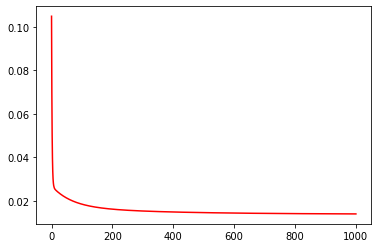

In [65]:
# plot cost vs iterations 
# note gradient descent return costs for all iterations
plt.plot(range(len(cost)),cost,'r-')

evaluation metric is 2.0158020535548684
the values of evaluation metric is  [2.1496909180963883, 2.015937673167331, 1.975929966364449, 1.9624053800274257]


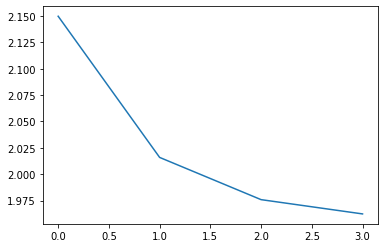

In [74]:
# print evaluation metric for test set while 
y_pred = X_test@theta 
print('evaluation metric is' , evaluation_metric(y_test,y_pred))
 
# changing max_iteration from 500 to 2000
evl_mrt=[]
for max_iteration in list(range(500 , 2001 , 500)):
    tht , err = gradient_descent(X_train, y_train, max_iteration, 0.1)
    y_prd = X_test@tht
    evl_mrt.append(evaluation_metric(y_test,y_prd))
# Note the best value of evaluation metric you get
print('the values of evaluation metric is ',evl_mrt)
plt.plot(evl_mrt)

In [77]:
#best evaluated value
best_val=evl_mrt[-1]

In [86]:
# compare your solution with scikit-learn library
from sklearn import datasets, linear_model

model = linear_model.LinearRegression(fit_intercept=True, normalize=False)
model.fit(X_train, y_train)
#print(model.coef_, model.intercept_)
y_prd = X_test@model.coef_
sk_val = evaluation_metric(y_test,y_prd)
print('Best Evaluated Value ' ,best_val)
print('sk-learn value ',sk_val)

Best Evaluated Value  1.9624053800274257
sk-learn value  3.0071971728247253


In [90]:
# Create linear regression object
reg_model= LinearRegression()

In [91]:
# Train the model using the training sets
reg_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Predict on test set and print evaluation metric
# How much does it differ by from 